In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Asus\Downloads\Assignment portfolio_DLM\HeartDiseaseTrain-Test.csv")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

C:\Users\Asus\AppData\Local\Temp\ipykernel_3380\2065071794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='Set2')


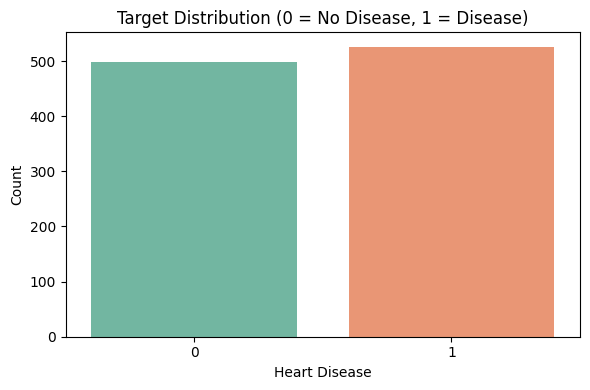

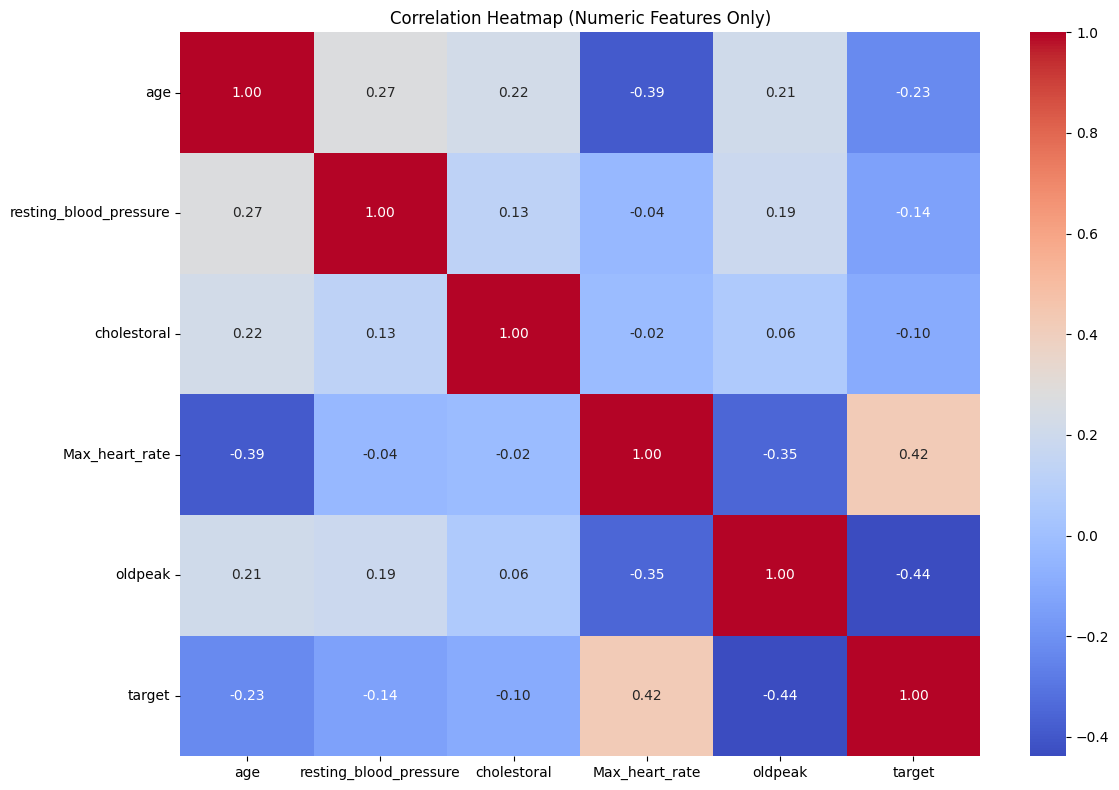

C:\Users\Asus\AppData\Local\Temp\ipykernel_3380\2065071794.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=data, palette='Set3')
C:\Users\Asus\AppData\Local\Temp\ipykernel_3380\2065071794.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=data, palette='Set3')
C:\Users\Asus\AppData\Local\Temp\ipykernel_3380\2065071794.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=data, palette='Set3')
C:\Users\Asus\AppData\Local\Temp\ipykernel_3380\2065071794.py:24: FutureW

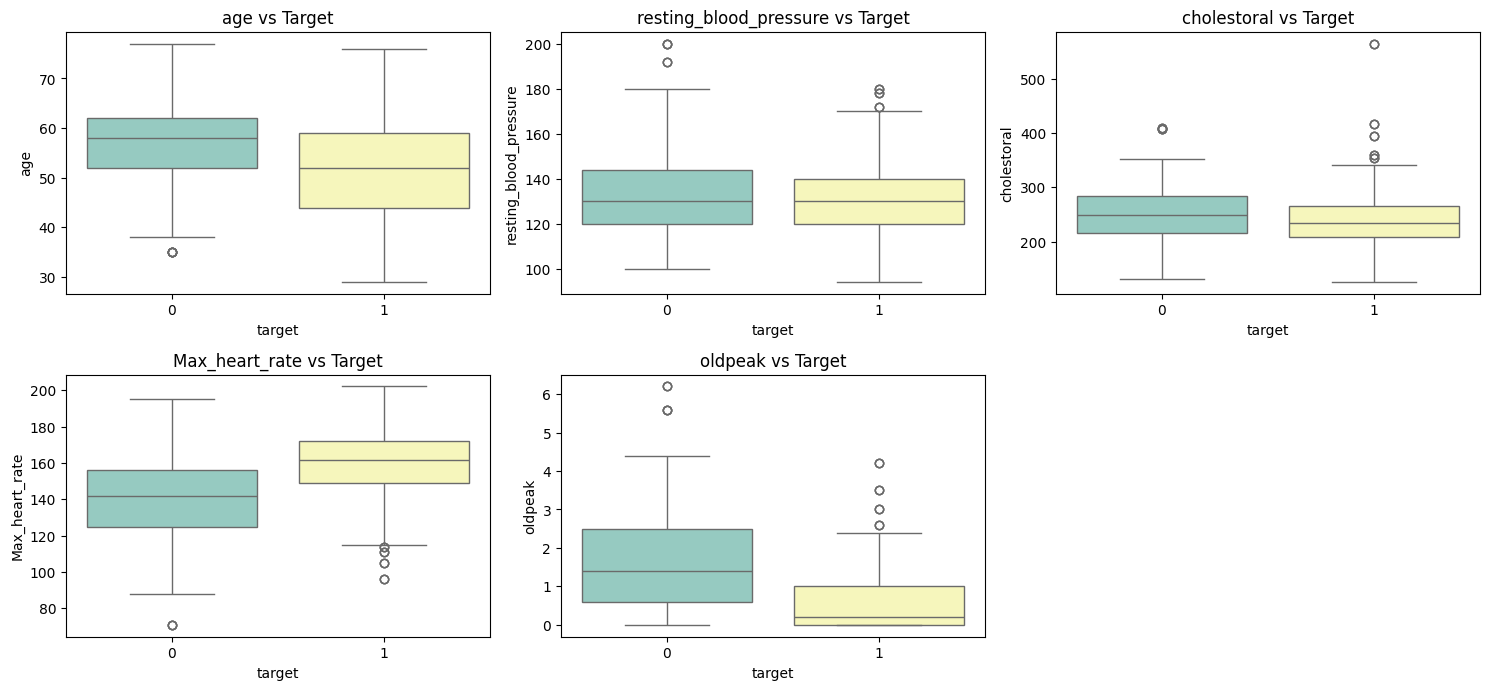

In [ ]:

# Target Variable Distribution 
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data, palette='Set2')
plt.title('Target Distribution (0 = No Disease, 1 = Disease)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#  Correlation Heatmap 
numeric_data = data.select_dtypes(include=["int64", "float64"])  
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.tight_layout()
plt.show()

# Boxplots of Numeric Features vs Target 
numeric_features = numeric_data.columns.drop("target")  

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='target', y=col, data=data, palette='Set3')
    plt.title(f'{col} vs Target')
    plt.tight_layout()
plt.show()


In [5]:
# Data Preprocessing 
X = data.drop("target", axis=1)
y = data["target"]

categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)

In [6]:
#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.25, random_state=42)

# Model Training 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)


Model Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       132
           1       0.77      0.84      0.80       125

    accuracy                           0.80       257
   macro avg       0.80      0.80      0.80       257
weighted avg       0.80      0.80      0.80       257



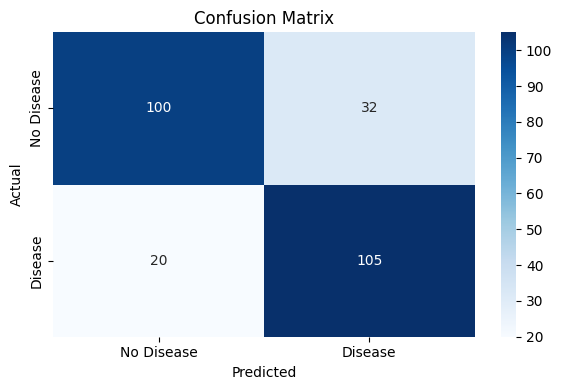

In [7]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()